# Анализ данных интернет-магазина «Стримчик»

**Описание проекта:** Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

**Цель исследования:** Используя данные до 2016 года, спланировать кампанию на 2017-й. 

**Ход исследования:**
1. Загрузка данных и изучение датасета.
2. Предобработка данных. Работа с названиями столбцов, типами данных, пропущенными значениями, дубликатами и создание новых столбцов. 
3. Исследовательский анализ данных. Работа с данными по выпуску игр, платформ, по продажам, отзывам. 
4. Составление портрета пользователя каждого региона.
5. Проверка гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые 
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
6. Общий вывод.

**Описание данных:**
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Данные в исходном датасете:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Загрузка данных

In [1]:
#сразу импортируем библиотеки, которые могут нам понадобиться 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import binom
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import ttest_ind

### Описание данных

In [2]:
#открываем датасет и смотрим общую информацию

data = pd.read_csv('/datasets/games.csv')

display(data.head(20))
display(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

**Комментарий:** В представленном датасете у нас есть информация о названии игры, платформе, годе выпуска, жанре, продажах в Северной Америке, Европе, Японии и других странах, а также оценка критиков, пользователей и рейтинг от организации ESRB. Представлена выборка из более чем 16 тысяч игр, для анализа должно быть достаточно. 

Датасет явно имеет пропущенные значения в названиях игр, годе выпуска, жанре, оценке критиков, пользователей и рейтинге. 

## Предобработка данных 

### Замена названия столбцов
Приводим данные к общему виду, к нижнему регистру. 

In [3]:
data.columns #проверяем текущие названия столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
#заменяем названия столбцов с единым регистром
data = data.rename(columns={
    'Name':'name', 
    'Platform':'platform', 
    'Year_of_Release':'year_of_release', 
    'Genre':'genre', 
    'NA_sales':'na_sales', 
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales', 
    'Other_sales':'other_sales', 
    'Critic_Score':'critic_score', 
    'User_Score':'user_score', 
    'Rating':'rating'
}
           ) 

display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В этом шаге мы привели названия столбцов к общему виду.

### Работы с типами данных
Преобразовываем тип данных в нужный для исследования. Для начала посмотрим, какой тип данных в каждом столбце датасета. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Требуется замена типа данных в следующих столбцах:
- `year_of_release`: c float на int, с такими данными будет проще работать. Datetime здесь не нужен, так как в данных только годы.
- `user_score`: с object на float, так как оценка выражена в дробных числах, использование str некорректно при работе с численными данными. 

In [47]:
#заменяем тип данных в столбце data['year_of_release']
data['year_of_release'] = data['year_of_release'].dropna().astype('int')

#заменяем тип данных в столбце data['user_score']
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [48]:
display(data.head(10))
display(data.info()) #проверяем, что тип данных заменился корректно

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 2.2+ MB


None

### Обработка пропусков, дубликатов и аномальных значений

В этом шаге в первую очередь оцениваем наличие дубликатов и аномальных значений, прежде чем работать с пропусками и заполнять их. 

#### Дубликаты

In [8]:
data.duplicated().sum() #проверяем датасет на явные дубликаты

0

In [9]:
data['genre'].unique() #проверяем неявные дубликаты в жанре

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
data['platform'].unique() #проверяем неявные дубликаты среди названий платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
data.duplicated(subset=['name', 'year_of_release', 'platform']).sum() 
#проверяем неявные дубликаты среди строк, где повторяются названия игр, год релиза и платформа

2

In [12]:
data = data.drop_duplicates(subset=['name', 'year_of_release', 'platform'])
data.duplicated(subset=['name', 'year_of_release', 'platform']).sum()
#удаляем неявные дубликаты и проверяем, что они удалены

0

**Комментарий:** Явных дубликатов в датасете нет, неявные были удалены. Проверить наличие дубликатных названий среди игр, кажется, не совсем реально, но, уверена, на исследовательский анализ это не повлияет. 

#### Аномальные значения

Аномалии могут встретиться в оценках пользователей и критиков, так как среди них точно не должно быть оценок выше 10 / выше 100 и отрицательных значений. 

In [13]:
data['critic_score'].describe()

count    8136.000000
mean       68.965954
std        13.938153
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [14]:
data['user_score'].describe()

count    7589.000000
mean        7.125260
std         1.499989
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

**Комментарий:** Аномальных значений нет. 

#### Пропуски

Прежде чем начать работу с пропусками, необходимо понять, что означает 'tbd' в столбце с оценкой пользователей. 

**Аббревиатура tbd** в столбце user_score, скорее всего, означает "to be determined" (подлежит определению). Это может указывать на то, что оценка пользователя еще не была выставлена или недостаточно данных для ее подсчета. Чтобы правильно обработать это значение, можно преобразовать значения "tbd" в NaN, чтобы указать на отсутствие данных. После этого можно проверить пропуски и оценить их масштаб. 

In [15]:
#преобразуем tbd в NaN
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [16]:
data.isnull().sum() #проверяем пропуски

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

**Комментарий:** Серьезные (практически половина) пропуски мы видим в оценке критиков и оценке пользователей. Пропуски в оценке и рейтинге могут быть вызваны их отсутствием, возможно, пользователи/критики не оставляли оценки в принципе, либо ещё эти оценки не получили (те самые 'tbd'). Какая-либо замена средней/медианой может серьезно исказить выборку, как и заполнение нулями. Сильно проще было бы при наличии среднего балла, высчитанного, например, для определенного жанра или по группе игр, но и заполнение такой средней оценкой исказило бы данные. Для того, чтобы не терять эти данные, считаю логичным заполнить пропуски в оценке, например, отрицательным числом, просто чтобы удобно было фильтровать и исключать такие данные в дальнейшем.

В столбце рейтинга пропуски можно заменить на Unknown, если игра не оценивалась организацией ESRB. Вероятнее всего, с этим пропуски и связаны. Не исключен и технический момент - данные могли просто затеряться. 

Потеря названия, года и жанра могут быть вызваны и техническим, и человеческим факторами, количество таких пропусков незначительно, заменить их ничем нельзя, поэтому оставляем как есть.

In [17]:
#заполняем пропуски в 'rating' на 'unknown' 
data['rating'].fillna('Unknown', inplace=True)

### Создание новых столбцов
Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец.

In [18]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


### Предобработка данных: выводы

В этом шаге:
- проверили, что явных дубликатов в датасете нет, а также нет неявных дубликатов среди названий жанра и платформ, неявные дубликаты среди строк с названием игры, годом релиза и платформой были удалены (2);
- проверили, что нет аномальных значений в оценках пользователей и критиков;
- определена аббревиатура tbd в столбце user_score как "to be determined" (подлежит определению), заменена на NaN;
- обработаны пропуски: оставлены пропуски в названиях игр, в жанрах, в годе релиза, но заменены на отрицательные значения значительные пропуски в оценке критиков и пользователей, а также заменены пропуски в rating на unknown;
- были высчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.

## **Исследовательский анализ данных**

В этом шаге мы определим актуальный для построения прогноза период, оценим прибыльность разных платформ, влияние отзывов на продажи и распределение игр по жанрам. 

### Определение актуального периода


Выбрав актуальный период, мы можем ответить на вопросы о потенциально прибыльных платформах, о влиянии отзывов на продажи внутри платформ, об общем распределении игр по жанрам. Прежде чем определить, за какой период данные будут актуальны для построения прогноза на 2017-й год, оценим несколько моментов по исходному датасету:
- сколько игр выпускалось в разные годы;
- как менялись продажи по платформам;
- какие платформы имеют наибольшие суммарные продажи в распределении по годам; 
- за какой характерный срок появляются новые и исчезают старые платформы.

Ответив на эти вопросы, мы сможем определить актуальный для построения прогноза период. 

**Сколько игр выпускалось в разные годы?**

In [19]:
grouped_year = data.groupby('year_of_release').count().reset_index() #группируем данные по годам 
sorted_year = grouped_year.sort_values(by='year_of_release', ascending=False) #сортируем данные

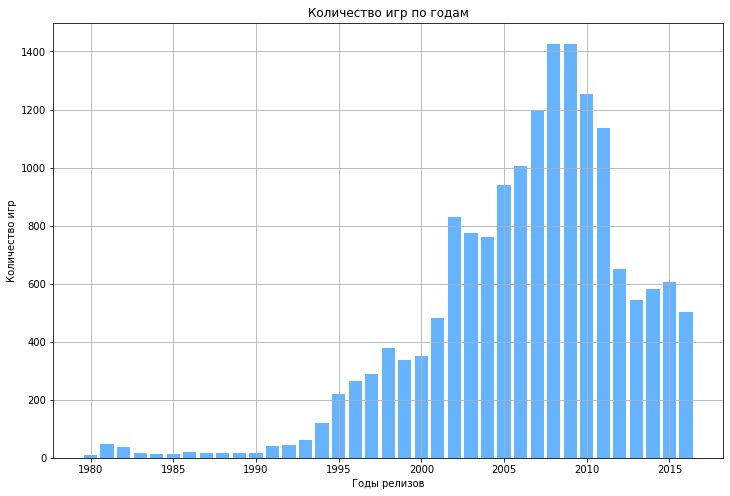

,year_of_release,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,2016.0,502,502,502,502,502,502,502,232,262,502,502
1,2015.0,606,606,606,606,606,606,606,225,297,606,606
2,2014.0,581,581,581,581,581,581,581,261,329,581,581
3,2013.0,544,544,544,544,544,544,544,273,304,544,544
4,2012.0,652,652,652,652,652,652,652,320,338,652,652
5,2011.0,1136,1136,1136,1136,1136,1136,1136,500,501,1136,1136
6,2010.0,1255,1255,1255,1255,1255,1255,1255,500,467,1255,1255
7,2009.0,1426,1426,1426,1426,1426,1426,1426,651,614,1426,1426
8,2008.0,1427,1427,1427,1427,1427,1427,1427,715,661,1427,1427
9,2007.0,1197,1197,1197,1197,1197,1197,1197,692,629,1197,1197


In [20]:
#строим гистограмму по количеству выпущенных игр в разные годы
plt.figure(figsize=(12, 8))
plt.bar(sorted_year['year_of_release'], sorted_year['name'], color='#66b3ff')
plt.title('Количество игр по годам')
plt.xlabel('Годы релизов')
plt.ylabel('Количество игр')
plt.grid(True) 
plt.show()

#выводим таблицу с числовыми значениями также для наглядности
sorted_year.reset_index(drop=True)

**Комментарий:** Мы видим тенденцию, что после 2011 года, начиная с 2012 выпуск игр заметно сократился по сравнению с периодом 2005-2011 годов. В среднем ежегодно с 2012 по 2016 год выпускалось 500-600 игр. В таком случае данные за все периоды нам не нужны, стоит рассмотреть более близкие к 2017 году периоды.

#### Как менялись продажи по платформам?

In [21]:
#создаем датасет с информацией о платформах, годах продажи и итоговой сумме продажи
platform_sales = data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

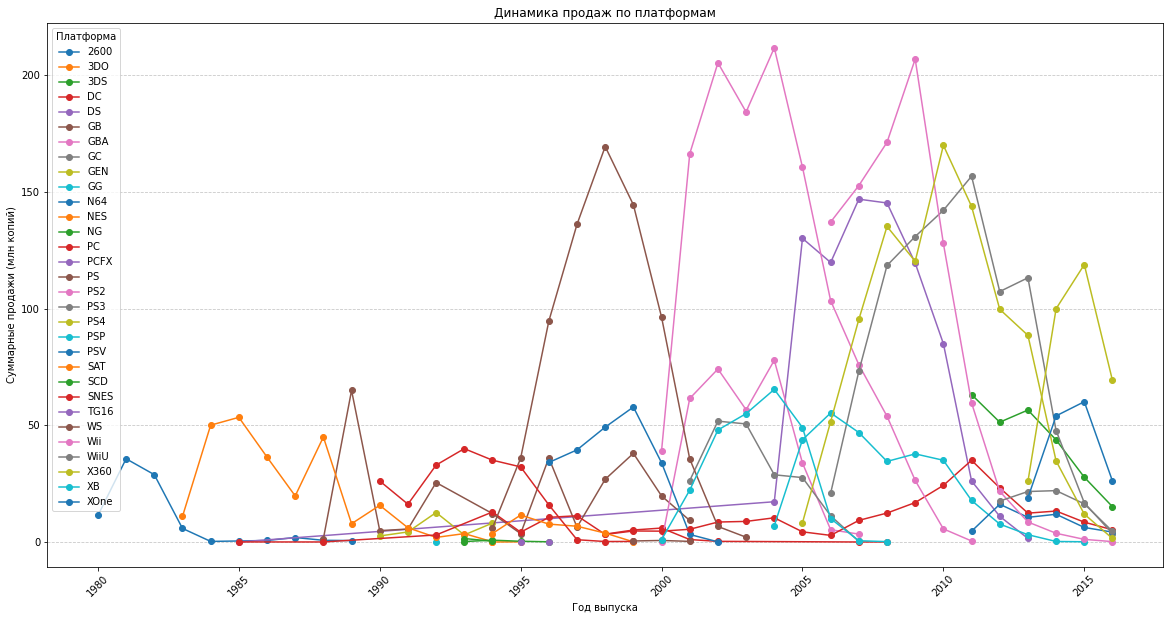

In [22]:
#строим линейный график для возможности сравнивать продажи по платформам по годам
plt.figure(figsize=(20, 10))

#создаем Series с уникальными названиями платформ
popular_platforms = platform_sales['platform'].unique()

#создаем функцию, которая будет строить линейный график для каждого уникального названия платформы
for platform in popular_platforms:
    platform_data = platform_sales[platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], marker='o', label=platform)

plt.title('Динамика продаж по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)
plt.legend(title='Платформа')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Комментарий:** График не очень наглядный из-за обилия платформ, поэтому логичнее построить сравнительный график для наиболее популярных. 

In [23]:
#создаем отсортированную таблицу наиболее продаваемых за все годы платформ
total_platform = data.groupby('platform')['total_sales'].sum().reset_index()
sort_total_platform = total_platform.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
sort_total_platform.head(10)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.64
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


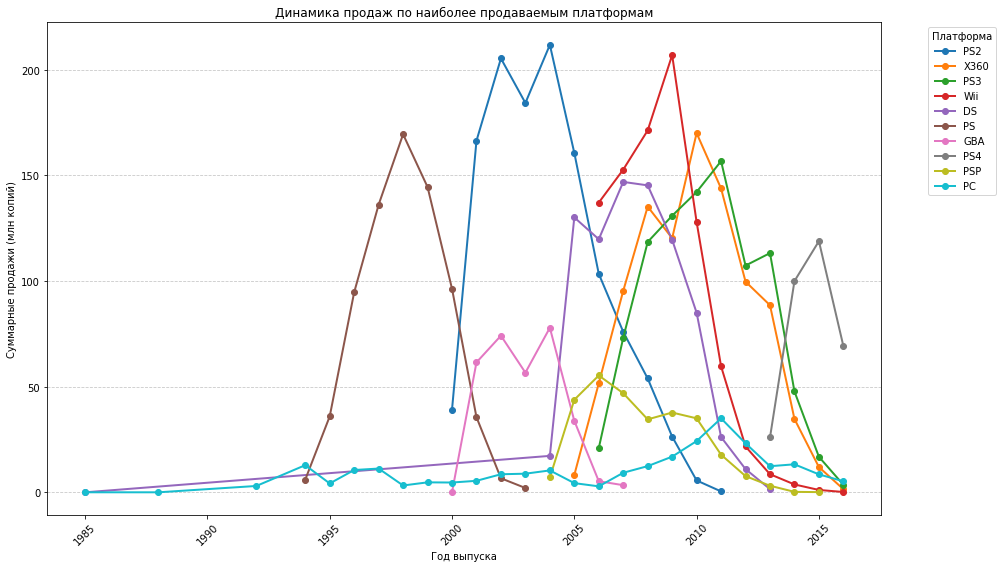

In [24]:
#выбираем топ-10
top_platforms = total_platform.nlargest(10, 'total_sales')['platform'] 

#фильтруем исходный датасет по топ-10 платформам
filtered_data_platforms = data[data['platform'].isin(top_platforms)] 
platform_sales = filtered_data_platforms.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#строим график
plt.figure(figsize=(14, 8))

for platform in top_platforms:
    platform_data = platform_sales[platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], marker='o', label=platform, linewidth=2)

plt.title('Динамика продаж по наиболее продаваемым платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Комментарий**:  С ходом времени количество платформ увеличивалось и увеличивалось количество продаж сразу нескольких платформ - если в 90-е популярность имелась только у PS, то в 2010 видим пики сразу у PS3, X360 и Wii. На данном графике видно, что последний скачок популярности имела платформа PS4 (пик приходится на 2015 год), ранее пики популярности (ближе к 2010 году) были у PS3, X360 и Wii. 

#### Какие платформы имеют наибольшие суммарные продажи в распределении по годам?

    platform  year_of_release  total_sales
19        PC           1985.0         0.04
20        PC           1988.0         0.03
21        PC           1992.0         3.03
22        PC           1994.0        12.87
46        PS           1995.0        35.96
47        PS           1996.0        94.70
48        PS           1997.0       136.17
49        PS           1998.0       169.49
50        PS           1999.0       144.53
51        PS           2000.0        96.37
56       PS2           2001.0       166.43
57       PS2           2002.0       205.38
58       PS2           2003.0       184.31
59       PS2           2004.0       211.81
60       PS2           2005.0       160.66
94       Wii           2006.0       137.15
95       Wii           2007.0       152.77
96       Wii           2008.0       171.32
97       Wii           2009.0       206.97
110     X360           2010.0       170.03
72       PS3           2011.0       156.78
73       PS3           2012.0       107.35
74       PS

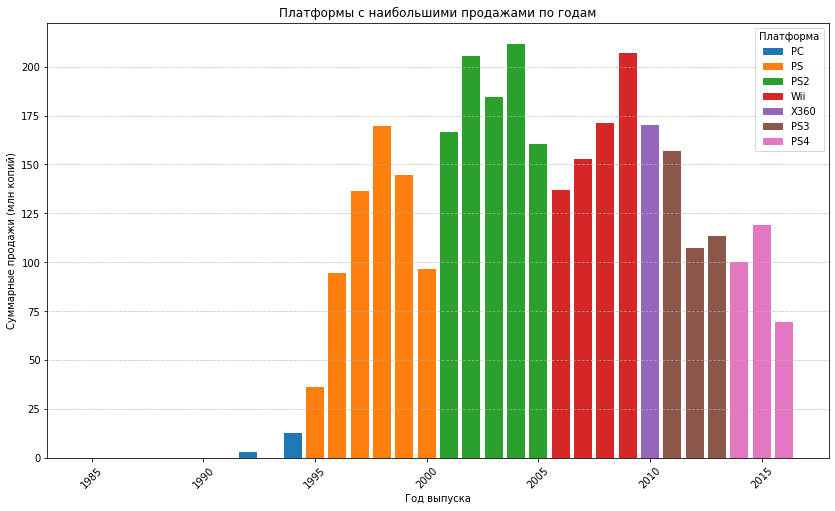

In [25]:
#найдем платформы с наибольшими суммарными продажами по годам
top_platforms_by_year = platform_sales.loc[platform_sales.groupby('year_of_release')['total_sales'].idxmax()]

#выводим таблицу для наглядности
print(top_platforms_by_year)

#строим график
plt.figure(figsize=(14, 8))
for platform in top_platforms_by_year['platform'].unique():
    platform_data = top_platforms_by_year[top_platforms_by_year['platform'] == platform]
    plt.bar(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Платформы с наибольшими продажами по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)
plt.legend(title='Платформа')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Комментарий:** В распределении по годам видим, во-первых, что в среднем популярность платформ держится 2-4 года. Во-вторых, можем обратить внимание, что последние три года популярность имела платформа PS4 - это может быть важно для построения прогнозов на 2017 год. В топ самых продаваемых за последние 20 лет можем внести PS4 (2014-2016), PS3(2011-2013), X360(2010), Wii(2006-2009), PS2(2001-2005), PS(1995-2000).

#### За какой характерный срок появляются новые и исчезают старые платформы?

Для ответа на этот вопрос, необходимо найти минимальный и максимальный год продаж для каждой платформы, вычислить срок активности платформ и построить распределение длин активного периода платформ. 

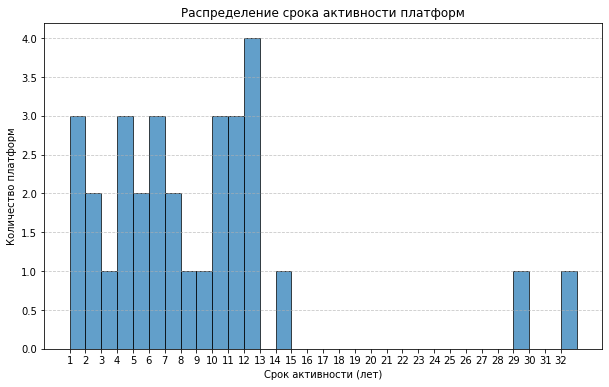

   platform     min     max  lifespan
13       PC  1985.0  2016.0      32.0
4        DS  1985.0  2013.0      29.0
5        GB  1988.0  2001.0      14.0
28     X360  2005.0  2016.0      12.0
19      PSP  2004.0  2015.0      12.0
16      PS2  2000.0  2011.0      12.0
11      NES  1983.0  1994.0      12.0
3        DC  1998.0  2008.0      11.0
26      Wii  2006.0  2016.0      11.0
17      PS3  2006.0  2016.0      11.0
0      2600  1980.0  1989.0      10.0
23     SNES  1990.0  1999.0      10.0
15       PS  1994.0  2003.0      10.0
29       XB  2000.0  2008.0       9.0
6       GBA  2000.0  2007.0       8.0
7        GC  2001.0  2007.0       7.0
10      N64  1996.0  2002.0       7.0
2       3DS  2011.0  2016.0       6.0
20      PSV  2011.0  2016.0       6.0
21      SAT  1994.0  1999.0       6.0
27     WiiU  2012.0  2016.0       5.0
8       GEN  1990.0  1994.0       5.0
12       NG  1993.0  1996.0       4.0
30     XOne  2013.0  2016.0       4.0
18      PS4  2013.0  2016.0       4.0
25       WS 

In [26]:
#находим минимальный и максимальный год для каждой платформы
platform_lifespan = data.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min'] + 1 
#для удобства добавили столбец с продолжительностью "жизни" платформы

max_lifespan = int(platform_lifespan['lifespan'].max())

#строим гистограмму для анализа долгожительства платформ
plt.figure(figsize=(10, 6))
plt.hist(platform_lifespan['lifespan'], bins=range(1, max_lifespan + 2), edgecolor='black', alpha=0.7)
plt.title('Распределение срока активности платформ')
plt.xlabel('Срок активности (лет)')
plt.ylabel('Количество платформ')
plt.xticks(range(1, max_lifespan + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(platform_lifespan[['platform', 'min', 'max', 'lifespan']].sort_values(by='lifespan', ascending=False))
print()
print(platform_lifespan['lifespan'].describe())

**Комментарий:** Из графика и описательной статистики видим, что в среднем платформы существуют около 7 лет, что можем считать приблизительной цифрой появления новых и устаревания старых платформ. Последнее поколение консолей появилось в 2013 году (как раз PS4 и XOne). 

#### Определение актуального периода: выводы 
Для определения актуального для исследовательского анализа периода мы должны учитывать основной фактор — эти данные помогут построить прогноз на 2017 год. Какие выводы мы сделали на данный момент:
1. **Количество игр: тенденции**. После 2011 года, начиная с 2012 выпуск игр заметно сократился по сравнению с периодом 2005-2011 годов. В среднем ежегодно с 2012 по 2016 год выпускалось 500-600 игр. То есть тенденция по количеству игр держится уже около 5 лет. 
2. **Как менялись продажи по платформам**. С ходом времени количество платформ увеличивалось и увеличивалось количество продаж сразу нескольких платформ. Последний скачок популярности имела платформа PS4 (пик приходится на 2015 год), ранее пики популярности (ближе к 2010 году) были у PS3, X360 и Wii.
3. **Наибольшие суммарные продажи в распределении по годам**. В распределении по годам видим, во-первых, что в среднем популярность платформ держится 2-4 года. Во-вторых, можем обратить внимание, что последние три года популярность имела платформа PS4 - это может быть важно для построения прогнозов на 2017 год. В топ самых продаваемых за последние 20 лет можем внести PS4 (2014-2016), PS3(2011-2013), X360(2010), Wii(2006-2009), PS2(2001-2005), PS(1995-2000).
4. **Срок популярности платформ**. В среднем платформы существуют около 7 лет, что можем считать приблизительной цифрой появления новых и устаревания старых платформ. Последнее поколение консолей появилось в 2013 году (как раз PS4 и XOne). 

**Итог:** наиболее актуальным можно считать период приблизительно в 5 лет, если учитывать тенденцию количества выпускаемых игр, среднее время жизни и популярности платформ. Также стоит учесть, что последнее поколение консолей появилось в 2013 году, которое сейчас и имеет популярность. Поэтому для анализа мы возьмем данные за 2013-2016 годы.

### Потенциально прибыльные платформы

Здесь и далее мы используем данные за 2013-2016 годы. Стоит учитывать, что данные за 2016 год могут быть неполными, поэтому тенденции лучше оценивать по 2015 году. 

In [27]:
actual_data = data[data['year_of_release'] > 2012]
#создаем актуальный датасет за 2013-2016 годы

В этом шаге мы ответим на вопрос, какие платформы лидируют по продажам, растут они или падают.

   Platform  Sales_Trend
4       PS4       14.868
10     XOne        2.764
5       PSP       -1.510
6       PSV       -2.467
2        PC       -2.615


/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


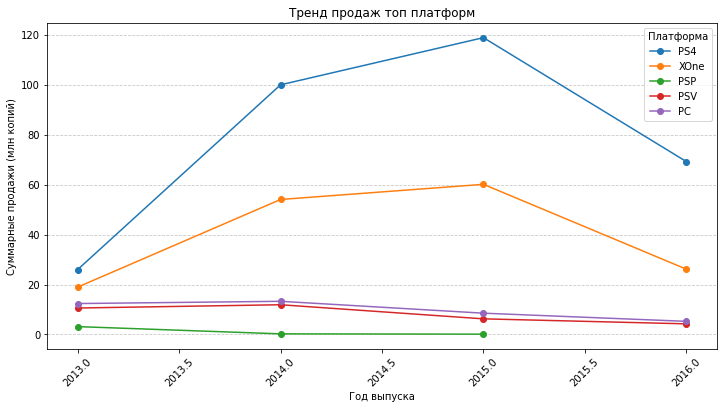

In [28]:
#группируем актуальный датасет по платформам и годам
platform_year_sales = actual_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#определяем тренд продаж для каждой платформы 2013-2016 годов с помощью линейной регрессии
platform_trends = []
for platform in platform_year_sales['platform'].unique():
    platform_data = platform_year_sales[platform_year_sales['platform'] == platform]
    slope, intercept, r_value, p_value, std_err = linregress(platform_data['year_of_release'], platform_data['total_sales'])
    platform_trends.append((platform, slope))

#создаем DataFrame с результатами
platform_trends_df = pd.DataFrame(platform_trends, columns=['Platform', 'Sales_Trend'])

#выбираем потенциально прибыльные платформы за 2013-2016 годы
potential_platforms = platform_trends_df.sort_values(by='Sales_Trend', ascending=False)

#показываем топ платформ с наибольшим ростом продаж
print(potential_platforms.head())  

#строим линейный график топ платформ за 2013-2016 годы для наглядности
plt.figure(figsize=(12, 6))
for platform in potential_platforms['Platform'].head(5):
    platform_data = platform_year_sales[platform_year_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], marker='o', label=platform)

plt.title('Тренд продаж топ платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)
plt.legend(title='Платформа')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Комментарий:** В качестве трендовых платформ за выбранный период можем считать PS4, XOne, PSP, PSV, PC. Тренды по продажам выше всего у PS4, XOne, к 2015 году мы наблюдаем рост их продаж, а значит, можем считать их потенциально прибыльными платформами. Снижение продаж мы видим у PSP, PSV и PC, но их продажи относительно стабильны. Ниже изучим глобальные продажи по платформам за выбранный период.

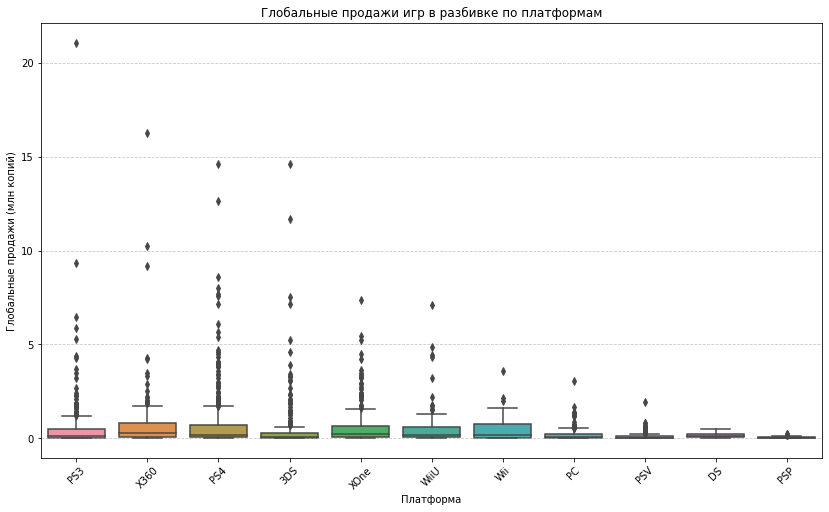

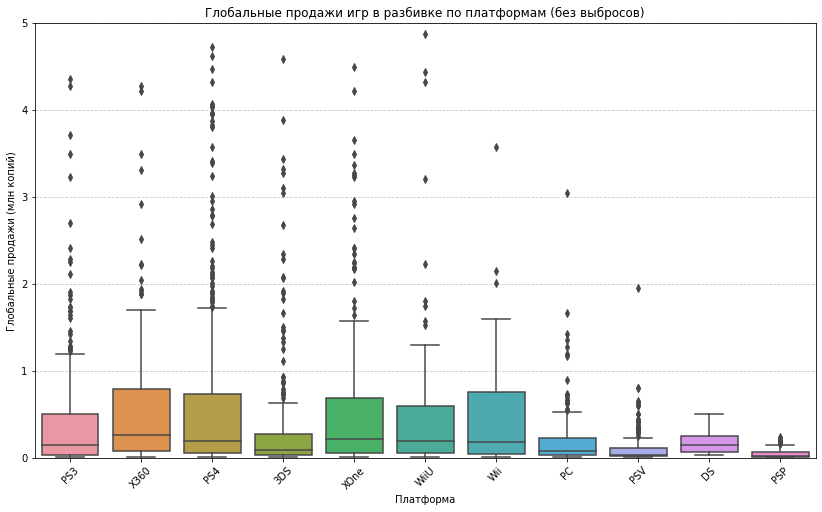

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


In [29]:
#построим график "ящик с усами" с учетом всех продаж
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=actual_data)
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#построим ещё один ящик с усами, но поставим ограничение в 5 млн копий, чтобы рассмотреть разницу ближе
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=actual_data)
plt.title("Глобальные продажи игр в разбивке по платформам (без выбросов)")
plt.xlabel("Платформа")
plt.ylabel("Глобальные продажи (млн копий)")
plt.ylim(0, 5)  #ограничиваем диапазон по оси Y
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#делаем для наглядности таблицу
platform_actual_sales = actual_data.groupby('platform')['total_sales'].sum().reset_index()

#сортируем по убыванию продаж
platform_actual_sales = platform_actual_sales.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
platform_actual_sales

**Комментарий:** Из графика и таблицы мы видим, что наиболее популярные в плане суммарных глобальных продаж за период 2013-2016 годов платформы: PS4, PS3, XOne, 3DS, X360. Меньше всего продано было игра на платформах PSP, DS, Wii. 

Итого самые хорошие показатели одновременно и по продаваемости, и по трендам продаж у PS4 и XOne, как раз у консолей последнего поколения.

### Влияние отзывов на продажи внутри платформ

Необходимо понять, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве платформы возьмем наиболее популярную из последних - PS4. Для наглядности построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

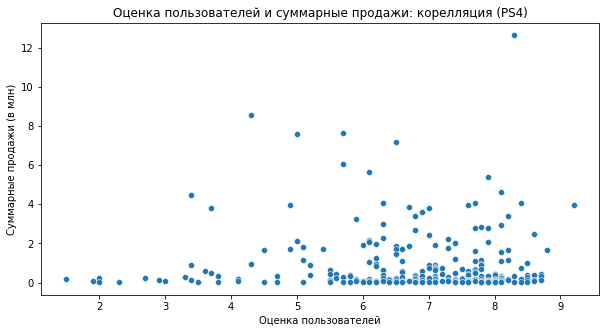

Корелляция между пользовательской оценкой и суммарными продажами: -0.031957110204556376


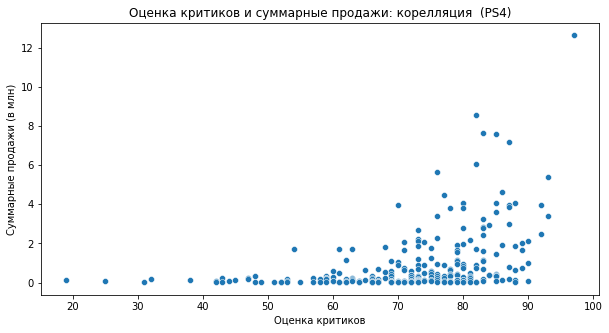

Корелляция между оценкой критиков и суммарными продажами: 0.40656790206178095


In [30]:
ps_data = actual_data[actual_data['platform'] == 'PS4']

#исключение отзывов с "-1"
filtered_actual_data = ps_data[(ps_data['user_score'] != -1) & (ps_data['critic_score'] != -1)]

#расчёт корреляции
correlation_user = filtered_actual_data['user_score'].corr(filtered_actual_data['total_sales'])
correlation_critic = filtered_actual_data['critic_score'].corr(filtered_actual_data['total_sales'])

#диаграмма рассеяния для пользовательских оценок
plt.figure(figsize=(10, 5))
sns.scatterplot(data=filtered_actual_data, x='user_score', y='total_sales')
plt.title('Оценка пользователей и суммарные продажи: корелляция (PS4)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи (в млн)')
plt.show()
print(f'Корелляция между пользовательской оценкой и суммарными продажами: {correlation_user}')


#диаграмма рассеяния для оценок критиков
plt.figure(figsize=(10, 5))
sns.scatterplot(data=filtered_actual_data, x='critic_score', y='total_sales')
plt.title('Оценка критиков и суммарные продажи: корелляция  (PS4)')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи (в млн)')
plt.show()
print(f'Корелляция между оценкой критиков и суммарными продажами: {correlation_critic}')

In [31]:
# код ревьюера

print(ps_data[(ps_data['user_score'] != -1) & (ps_data['critic_score'] != -1)].shape[0])
print(ps_data[(ps_data['user_score'] != -1)].shape[0])
print(ps_data[(ps_data['critic_score'] != -1)].shape[0])


392
392
392


**Комментарий:** Корелляция между пользовательской оценкой и суммарными продажами по сути отсутствует, но есть, пусть и не сильная, но положительная корелляция между оценкой критиков и суммарными продажами. 

Платформа: PS4
Корреляция между оценками пользователей и продажами: -0.03


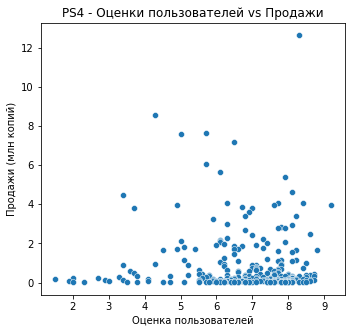

Платформа: XOne
Корреляция между оценками пользователей и продажами: -0.07


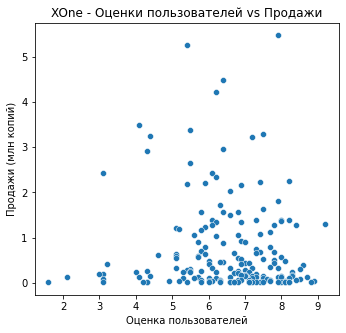

Платформа: PS3
Корреляция между оценками пользователей и продажами: 0.00


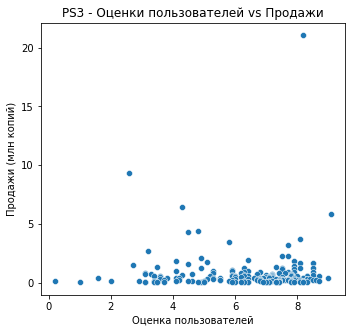

Платформа: X360
Корреляция между оценками пользователей и продажами: -0.01


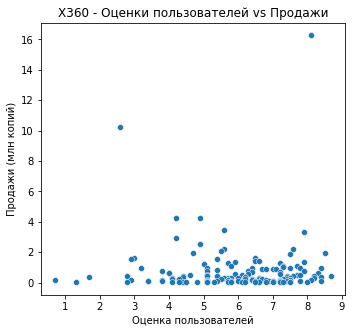

In [32]:
platforms = ['PS4', 'XOne', 'PS3', 'X360']

#функия для расчета корелляции пользовательской оценки с продажами
for platform_user in platforms:
    platform_data_user = actual_data[actual_data['platform'] == platform_user].copy()
    platform_data_user = platform_data_user.dropna(subset=['user_score', 'total_sales']) 
    #убираем пропуски именно у пользовательских оценок
    
#расчитываем корреляции для пользовательских оценок и выводим их
    user_corr = platform_data_user['user_score'].corr(platform_data_user['total_sales'])
    print(f"Платформа: {platform_user}")
    print(f"Корреляция между оценками пользователей и продажами: {user_corr:.2f}")

#строим диаграмму рассеяния для пользователей
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='user_score', y='total_sales', data=platform_data_user)
    plt.title(f"{platform_user} - Оценки пользователей vs Продажи")
    plt.xlabel("Оценка пользователей")
    plt.ylabel("Продажи (млн копий)")
    plt.show()

Платформа: PS4
Корреляция между оценками критиков и продажами: 0.41



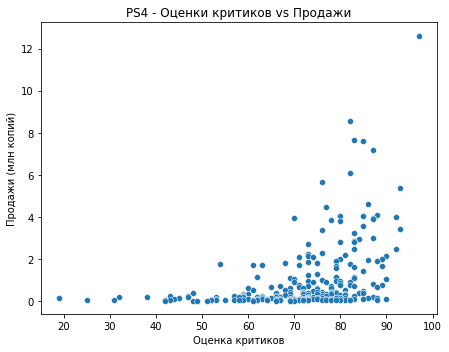

Платформа: XOne
Корреляция между оценками критиков и продажами: 0.42



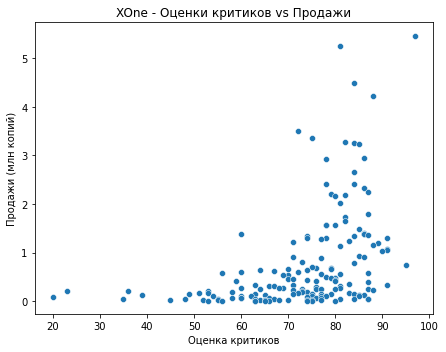

Платформа: PS3
Корреляция между оценками критиков и продажами: 0.33



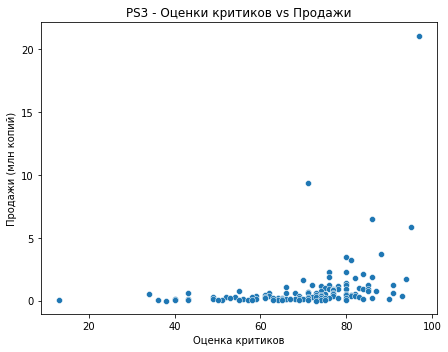

Платформа: X360
Корреляция между оценками критиков и продажами: 0.35



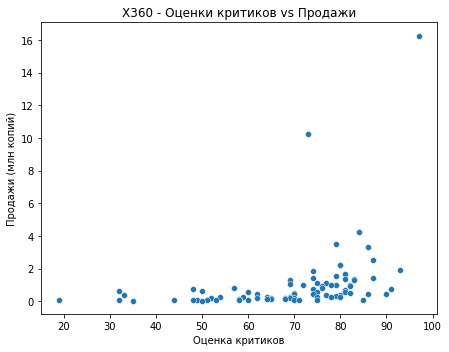

In [33]:
#функия для расчета корелляции оценки критиков с продажами
for platform_critic in platforms:
    platform_data_critic = actual_data[actual_data['platform'] == platform_critic].copy()
    platform_data_critic = platform_data_critic.dropna(subset=['critic_score', 'total_sales'])
    
#расчитываем корреляции для оценок критиков и выводим их
    critic_corr = platform_data_critic['critic_score'].corr(platform_data_critic['total_sales'])
    print(f"Платформа: {platform_critic}")
    print(f"Корреляция между оценками критиков и продажами: {critic_corr:.2f}\n")
    
#строим диаграмму рассеяния для критиков
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='critic_score', y='total_sales', data=platform_data_critic)
    plt.title(f"{platform_critic} - Оценки критиков vs Продажи")
    plt.xlabel("Оценка критиков")
    plt.ylabel("Продажи (млн копий)")
    plt.tight_layout()
    plt.show()

**НОВЫЙ ВЫВОД**: На примере нескольких платформ (PS4, PS3, XOne, X360) можем сделать вывод, что корелляция между пользовательской оценкой и итоговыми продажами есть, но очень слабая. С оценкой критиков такая корелляция значительно выше: более 0,22.  

### Общее распределение игр по жанрам

В данном шаге мы рассмотрим общее распределение игр по жанрам и ответим на вопросы:
- что можно сказать о самых прибыльных жанрах? 
- выделяются ли жанры с высокими и низкими продажами?

           genre  total_sales
8        Shooter        0.450
10        Sports        0.240
4       Platform        0.225
7   Role-Playing        0.125
2       Fighting        0.125
6         Racing        0.120
0         Action        0.110
9     Simulation        0.100
3           Misc        0.100
11      Strategy        0.080
5         Puzzle        0.060
1      Adventure        0.030


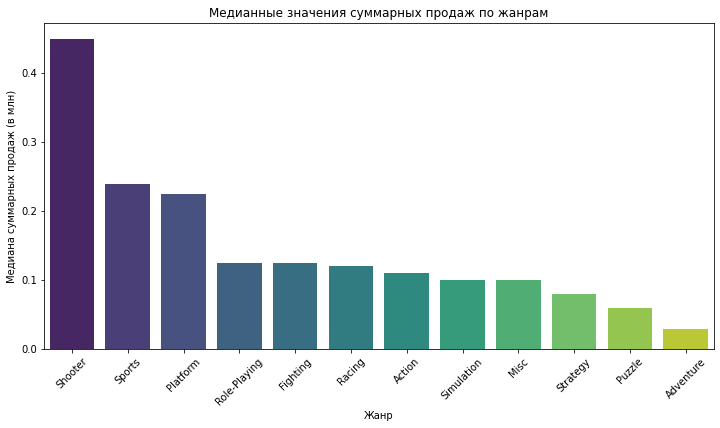

Жанры с высокими продажами:
       genre  total_sales
8    Shooter        0.450
10    Sports        0.240
4   Platform        0.225

Жанры с низкими продажами
           genre  total_sales
7   Role-Playing        0.125
2       Fighting        0.125
6         Racing        0.120
0         Action        0.110
9     Simulation        0.100
3           Misc        0.100
11      Strategy        0.080
5         Puzzle        0.060
1      Adventure        0.030


In [34]:
#создаем датасет с жанрами и медианным значением продаж за 2013-2016 годы
genre_sales = actual_data.groupby('genre')['total_sales'].median().reset_index()
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

print(genre_sales)

#диаграмма распределения по жанрам
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='total_sales', palette='viridis')
plt.title('Медианные значения суммарных продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медиана суммарных продаж (в млн)')
plt.xticks(rotation=45)
plt.show()

#анализ распределения и выделение жанров
high_sales_genres = genre_sales[genre_sales['total_sales'] > genre_sales['total_sales'].mean()]
low_sales_genres = genre_sales[genre_sales['total_sales'] <= genre_sales['total_sales'].mean()]

print('Жанры с высокими продажами:')
print(high_sales_genres)
print()
print('Жанры с низкими продажами')
print(low_sales_genres)

**Комментарий:** Топ-3 самых прибыльных жанров в 2013-2016 годах: Shooter, Sports, Platform. Жанры с самыми низкими продажами в эти же годы: Strategy, Puzzle, Adventure. Очевидно выделяются более продаваемые и менее продаваемые жанры.

### Исследовательский анализ данных: выводы

В этом шаге:
1. **Определили актуальный для прогноза на 2017 год период: 2013-2016 годы.**
2. **Определили потенциально прибыльные платформы**:
- *Тренды*. В качестве трендовых платформ за выбранный период можем считать PS4, XOne, PSP, PSV, PC. Тренды по продажам выше всего у PS4, XOne, к 2015 году мы наблюдаем рост их продаж, а значит, можем считать их потенциально прибыльными платформами. Снижение продаж мы видим у PSP, PSV и Wii, но их продажи относительно стабильны.
- *Суммарные продажи*. Наиболее популярные в плане суммарных глобальных продаж за период 2013-2016 годов платформы: PS4, PS3, X360, 3DS, XOne. Меньше всего продано было игра на платформах PSP, DS, Wii. 

Итого самые хорошие показатели одновременно и по продаваемости, и по трендам продаж у PS4 и XOne.

3. **Определили степень влияния отзывов на продажи внутри платформ на примере нескольких платформ**. На примере нескольких платформ (PS4, PS3, XOne, X360) можем сделать вывод, что корелляция между пользовательской оценкой и итоговыми продажами есть, но очень слабая. С оценкой критиков такая корелляция значительно выше: более 0,22.
4. **Рассмотрели общее распределение игр по жанрам**. Очевидно выделяются более продаваемые и менее продаваемые жанры.Топ-3 самых прибыльных жанров в 2013-2016 годах: Shooter, Sports, Platform. Жанры с самыми низкими продажами в эти же годы: Strategy, Puzzle, Adventure. 

## **Портрет пользователя каждого региона**
В этом шаге мы определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5).
- самые популярные жанры (топ-5). 

А также определим влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Топ-5 популярных платформ по регионам

В данном шаге мы опишем различия в долях продаж наиболее популярных платформ в регионах.

In [35]:
#функция для подсчета топ-5 платформ по продажам в заданном регионе
def top_platforms_by_region(region_sales_column):
    top_platforms = actual_data.groupby('platform')[region_sales_column].sum().reset_index()
    top_platforms = top_platforms.sort_values(by=region_sales_column, ascending=False).head(5)
    return top_platforms

#функция для расчета доли продаж
def sales_share(top_platforms, total_sales):
    top_platforms['sales_share'] = top_platforms.iloc[:, 1] / total_sales * 100
    return top_platforms

#функция для построения круговой диаграммы
def plot_pie_chart(top_platforms, region):
    plt.figure(figsize=(8, 8))
    plt.pie(top_platforms['sales_share'], labels=top_platforms['platform'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Топ-5 платформ по продажам: {region}')
    plt.axis('equal')  
    plt.show()

#### Северная Америка

Топ-5 платформ в Северной Америке по продажам:
   platform  na_sales  sales_share
4       PS4    108.74    24.842933
10     XOne     93.12    21.274360
9      X360     81.66    18.656188
3       PS3     63.50    14.507322
0       3DS     38.20     8.727239


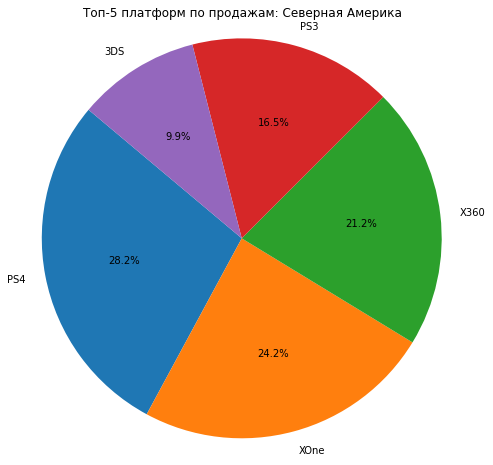

In [36]:
#общие продажи по региону
total_na_sales = actual_data['na_sales'].sum()

#топ-5 платформ и их доли продаж в Северной Америке
top_na_platforms = top_platforms_by_region('na_sales')
top_na_platforms = sales_share(top_na_platforms, total_na_sales)

#выводим на экран результаты с долями продаж
print('Топ-5 платформ в Северной Америке по продажам:')
print(top_na_platforms)

plot_pie_chart(top_na_platforms, 'Северная Америка')

#### Европа


Топ-5 платформ в Европе по продажам:
   platform  eu_sales  sales_share
4       PS4    141.09    35.971241
3       PS3     67.81    17.288326
10     XOne     51.59    13.152997
9      X360     42.52    10.840578
0       3DS     30.96     7.893328


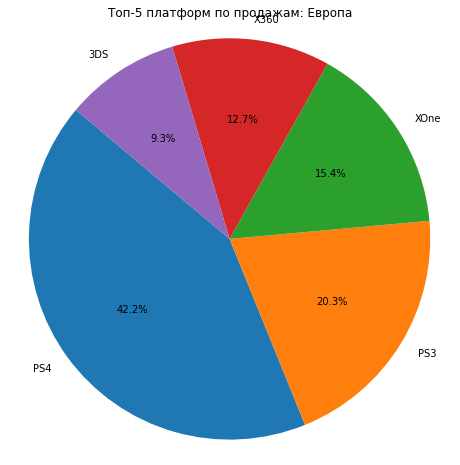

In [37]:
#общие продажи по региону
total_eu_sales = actual_data['eu_sales'].sum()

#топ-5 платформ и их доли продаж в Европе
top_eu_platforms = top_platforms_by_region('eu_sales')
top_eu_platforms = sales_share(top_eu_platforms, total_eu_sales)

#выводим на экран результаты с долями продаж
print('\nТоп-5 платформ в Европе по продажам:')
print(top_eu_platforms)

plot_pie_chart(top_eu_platforms, 'Европа')

#### Япония


Топ-5 платформ в Японии по продажам:
  platform  jp_sales  sales_share
0      3DS     67.81    48.167353
3      PS3     23.35    16.586163
6      PSV     18.59    13.205001
4      PS4     15.96    11.336838
8     WiiU     10.88     7.728371


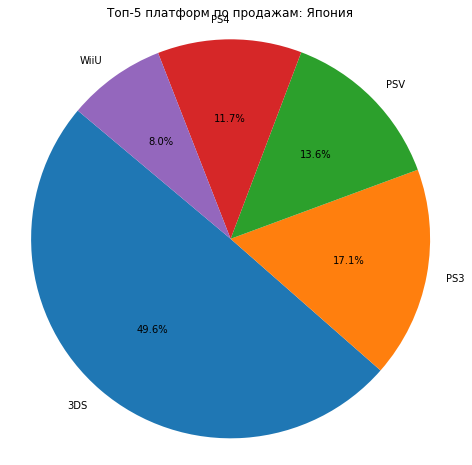

In [38]:
#общие продажи по региону
total_jp_sales = actual_data['jp_sales'].sum()

#топ-5 платформ и их доли продаж в Японии
top_jp_platforms = top_platforms_by_region('jp_sales')
top_jp_platforms = sales_share(top_jp_platforms, total_jp_sales)

#выводим на экран результаты с долями продаж
print('\nТоп-5 платформ в Японии по продажам:')
print(top_jp_platforms)

plot_pie_chart(top_jp_platforms, 'Япония')

**Комментарий:** Из полученных данных можно сделать вывод, что:
- Топ-5 популярных платформ в Северной Америке: X360, PS4, PS3, XOne, 3DS. Наибольшая доля по продажам на рынке среди этих пяти платформ у PS4 (28,2%).
- Топ-5 популярных платформ в Европе: PS4, PS3, X360, XOne, 3DS. Наибольшая доля по продажам на рынке среди этих пяти платформ у PS4 (42,2%). 
- Топ-5 популярных платформ в Японии: 3DS, PS3, PSV, PS4, WiiU. Наибольшая доля по продажам на рынке среди этих пяти платформ у 3DS (49,6%). У Японии явно отличаются вкусы и рынок от американского и европейского. 

### Топ-5 популярных жанров по регионам

В данном шаге мы опишем различия в долях продаж наиболее популярных жанров в регионах.

In [39]:
#функция для вычисления топ-5 жанров для региона
def calculate_top_genres(region_sales):
    genre_sales = actual_data.groupby('genre')[region_sales].sum().sort_values(ascending=False)
    top_genres = genre_sales.head(5)
    return top_genres

#### Северная Америка

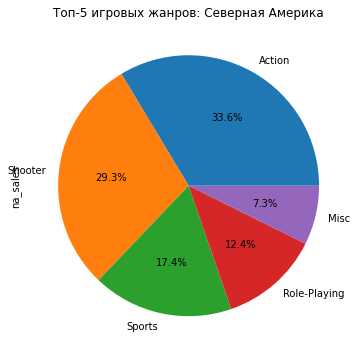

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64


In [40]:
#вычисление топ-5 жанров для Северной Америки
na_top_genres = calculate_top_genres('na_sales')
na_top_genres.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Топ-5 игровых жанров: Северная Америка')
plt.show()
print(na_top_genres)

#### Европа

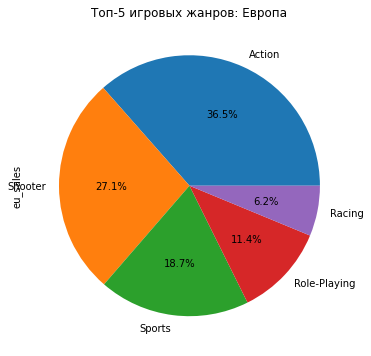

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64


In [41]:
#вычисление топ-5 жанров для Европы
eu_top_genres = calculate_top_genres('eu_sales')
plt.figure()
eu_top_genres.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Топ-5 игровых жанров: Европа')
plt.show()
print(eu_top_genres)

#### Япония

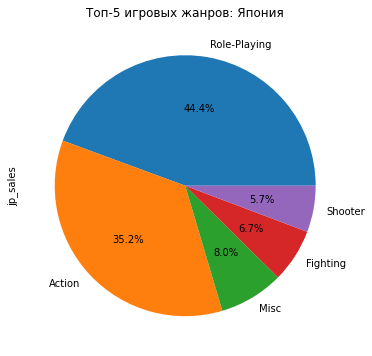

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


In [42]:
#вычисление топ-5 жанров для Японии
jp_top_genres = calculate_top_genres('jp_sales')
plt.figure()
jp_top_genres.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Топ-5 игровых жанров: Япония')
plt.show()
print(jp_top_genres)

**Комментарий:** Из полученных данных можно сделать вывод, что:
- Топ-5 популярных жанров в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc. Наибольшая доля по продажам на рынке среди этих пяти жанров у Action (29,3%).
- Топ-5 популярных жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing. Наибольшая доля по продажам на рынке среди этих пяти жанров у Action (36,5%). 
- Топ-5 популярных жанров в Японии: Role-Playing, Action, Misc, Fighting, Shooter. Наибольшая доля по продажам на рынке среди этих пяти жанров у Role-Playing (44,4%). У Японии снова явно отличаются вкусы и рынок от американского и европейского. 

### Влияние рейтинга ESRB на продажи в отдельном регионе

в этом шаге оценим влияние рейтинга ESRB на продажи в отдельных регионах. Значение "Unknown" в датасете мы оставляем: так можем оценить зависимость продажи и от отсутствия оценки ESRB. 

Средние продажи по рейтингу ESRB в регионе na_sales, млн копий:
 rating
M          0.447724
E          0.261755
E10+       0.215238
T          0.149520
Unknown    0.091525
Name: na_sales, dtype: float64


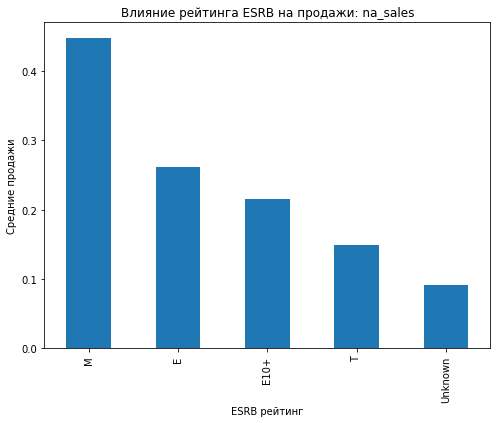

Средние продажи по рейтингу ESRB в регионе eu_sales, млн копий:
 rating
M          0.393821
E          0.276026
E10+       0.169405
T          0.125976
Unknown    0.080768
Name: eu_sales, dtype: float64


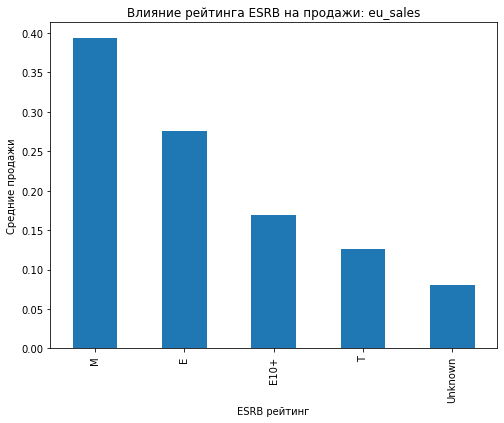

Средние продажи по рейтингу ESRB в регионе jp_sales, млн копий:
 rating
Unknown    0.087052
T          0.061832
E          0.050132
M          0.038238
E10+       0.023373
Name: jp_sales, dtype: float64


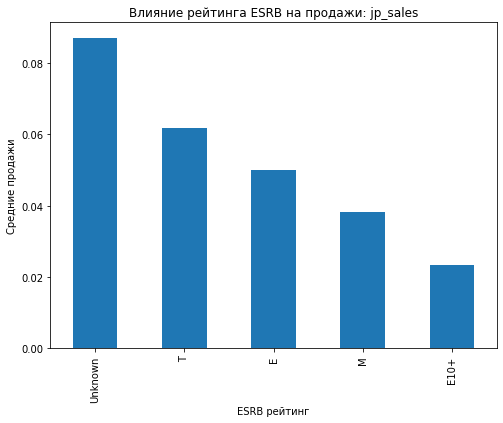

In [43]:
#функция для анализа влияния рейтинга ESRB на продажи в регионе
def analyze_esrb_effect(region_sales):
    esrb_sales = actual_data.groupby('rating')[region_sales].mean().sort_values(ascending=False)
    print(f'Средние продажи по рейтингу ESRB в регионе {region_sales}, млн копий:\n', esrb_sales)
    esrb_sales.plot(kind='bar', title=f'Влияние рейтинга ESRB на продажи: {region_sales}', figsize=(8, 6))
    plt.ylabel('Средние продажи')
    plt.xlabel('ESRB рейтинг')
    plt.show()

#анализ влияния для Северной Америки
analyze_esrb_effect('na_sales')

#анализ влияния для Европы
analyze_esrb_effect('eu_sales')

#анализ влияния для Японии
analyze_esrb_effect('jp_sales')

**Комментарий:**

1. **Северная Америка**. Больше всего продаж у рейтинга M (для взрослых), далее по популярности E и E10 (для всех, для всех 10+), менее популярны игры для подростков. 
2. **Европа**. Аналогично ситуации в Северной Америке: Больше всего продаж у рейтинга M (для взрослых), далее по популярности E и E10 (для всех, для всех 10+), менее популярны игры для подростков. 
3. **Япония**. Рынок Японии снова отличается: во-первых, большая часть игр продается без рейтинга ESRB (видимо, эта система больше работае на европейском и американском рынке), далее по популярности - игры для подростков, для детей и только потом уже игры для взрослых.

### Портрет пользователей: выводы

В этом шаге мы составили портрет пользователей трех разных регионов:
1. Северная Америка.
- **Топ-5 популярных платформ**. X360, PS4, PS3, XOne, 3DS. Наибольшая доля по продажам на рынке среди этих пяти платформ у PS4 (28,2%).
- **Топ-5 популярных жанров**. Action, Shooter, Sports, Role-Playing, Misc. Наибольшая доля по продажам на рынке среди этих пяти жанров у Action (29,3%).
- **Влияние рейтинга ESRB на продажи**.  Больше всего продаж у рейтинга M (для взрослых), далее по популярности E и E10 (для всех, для всех 10+), менее популярны игры для подростков.
2. Европа.
- **Топ-5 популярных платформ**. PS4, PS3, X360, XOne, 3DS. Наибольшая доля по продажам на рынке среди этих пяти платформ у PS4 (42,2%).
- **Топ-5 популярных жанров**. Action, Shooter, Sports, Role-Playing, Racing. Наибольшая доля по продажам на рынке среди этих пяти жанров у Action (36,5%). 
- **Влияние рейтинга ESRB на продажи**. Аналогично ситуации в Северной Америке: Больше всего продаж у рейтинга M (для взрослых), далее по популярности E и E10 (для всех, для всех 10+), менее популярны игры для подростков. 
3. Япония.
- **Топ-5 популярных платформ**. 3DS, PS3, PSV, PS4, WiiU. Наибольшая доля по продажам на рынке среди этих пяти платформ у 3DS (49,6%). У Японии явно отличаются вкусы и рынок от американского и европейского.
- **Топ-5 популярных жанров**. Role-Playing, Action, Misc, Fighting, Shooter. Наибольшая доля по продажам на рынке среди этих пяти жанров у Role-Playing (44,4%). У Японии снова явно отличаются вкусы и рынок от американского и европейского. 
- **Влияние рейтинга ESRB на продажи**. Рынок Японии снова отличается: во-первых, большая часть игр продается без рейтинга ESRB (видимо, эта система больше работае на европейском и американском рынке), далее по популярности - игры для подростков, для детей и только потом уже игры для взрослых.

## Проверка гипотез

В этом шаге мы проверим следующие гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Пояснение к формулировке гипотез:** В обоих случаях используется t-тест для независимых выборок. Этот тест подходит для сравнения средних значений двух групп и проверки предполагаемой гипотезы о равенстве этих средних. 

**Критерий для проверки гипотез:**
- Если \( p \)-value < 0.05, мы отвергаем нулевую гипотезу и считаем, что между группами есть статистически значимая разница.
- Если \( p \)-value ≥ 0.05, мы не имеем достаточных оснований отвергать нулевую гипотезу, и считаем, что значимой разницы между группами нет.

Пороговое значение выбрано 0,05, так как это наиболее усредненное значение: слишком строгий порог (0,01) или же, наоборот, слишком высокий (0,1) здесь не требуется. 

### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

- **Нулевая гипотеза (H0)**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- **Альтернативная гипотеза (H1)**: Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [44]:
#фильтрация данных по платформам
xone_scores = actual_data[actual_data['platform'] == 'XOne']['user_score']
pc_scores = actual_data[actual_data['platform'] == 'PC']['user_score']

#проверка на наличие пропущенных значений
xone_scores = xone_scores.dropna()
pc_scores = pc_scores.dropna()

#проведение t-теста
t_statistic, p_value = ttest_ind(xone_scores, pc_scores)

#вывод результатов
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('Нулевая гипотеза отклоняется')
else:
    print('Нулевая гипотеза не отклоняется')

T-statistic: 1.4788255981357277
P-value: 0.14012658403611647
Нулевая гипотеза не отклоняется


### Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

- **Нулевая гипотеза (H0)**: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- **Альтернативная гипотеза (H1)**: Средние пользовательские рейтинги жанров Action и Sports различны

In [45]:
#фильтрация данных по жанрам
action_scores = actual_data[actual_data['genre'] == 'Action']['user_score']
sports_scores = actual_data[actual_data['genre'] == 'Sports']['user_score']

#проверка на наличие пропущенных значений
action_scores = action_scores.dropna()
sports_scores = sports_scores.dropna()

#проведение t-теста
t_statistic, p_value = ttest_ind(action_scores, sports_scores)

#вывод результатов
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('Нулевая гипотеза отклоняется')
else:
    print('Нулевая гипотеза не отклоняется')

T-statistic: 11.535100577928208
P-value: 1.0517832389140023e-27
Нулевая гипотеза отклоняется


### Гипотезы: выводы

По итогам проверки двух гипотез, можем зафиксировать следующий вывод для данной выборки:
- не можем отвергнуть нулевую гипотезу: с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий;
- отвергаем нулевую гипотезу: с большой долей вероятности средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод

1. **ЗАГРУЗКА ДАННЫХ**. Был выгружен датасет /datasets/games.csv. В представленном датасете у нас есть информация о названии игры, платформе, годе выпуска, жанре, продажах в Северной Америке, Европе, Японии и других странах, а также оценка критиков, пользователей и рейтинг от организации ESRB. Представлена выборка из более чем 16 тысяч игр.


2. **ПРЕДОБРАБОТКА ДАННЫХ**. В этом шаге:
- проверили, что явных дубликатов в датасете нет, а также нет неявных дубликатов среди названий жанра и платформ, неявные дубликаты среди строк с названием игры, годом релиза и платформой были удалены (2);
- проверили, что нет аномальных значений в оценках пользователей и критиков;
- определена аббревиатура tbd в столбце user_score как "to be determined" (подлежит определению), заменена на NaN;
- обработаны пропуски: оставлены пропуски в названиях игр, в жанрах, в годе релиза, но заменены на отрицательные значения значительные пропуски в оценке критиков и пользователей, а также заменены пропуски в rating на unknown;
- были высчитаны суммарные продажи во всех регионах и записаны в отдельный столбец total_sales.

3. **ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ**. В этом шаге:
- определили актуальный для прогноза на 2017 год период: 2013-2016 годы;
- определили потенциально прибыльные платформы: cамые хорошие показатели одновременно и по продаваемости, и по трендам продаж у PS4 и XOne, последнего поколения консолей;
- определили степень влияния отзывов на продажи внутри платформ на примере нескольких платформ (PS4, PS3, XOne, X360): корелляция между пользовательской оценкой и итоговыми продажами есть, но очень слабая. С оценкой критиков такая корелляция значительно выше: более 0,22.  ;
- рассмотрели общее распределение игр по жанрам: очевидно выделяются более продаваемые и менее продаваемые жанры. Очевидно выделяются более продаваемые и менее продаваемые жанры.Топ-3 самых прибыльных жанров в 2013-2016 годах: Shooter, Sports, Platform. Жанры с самыми низкими продажами в эти же годы: Strategy, Puzzle, Adventure. 

4. **ПОРТРЕТ ПОЛЬЗОВАТЕЛЕЙ ПО РЕГИОНАМ**. В этом шаге мы составили портрет пользователей трех разных регионов:

**Северная Америка**.
- Топ-5 популярных платформ: X360, PS4, PS3, XOne, 3DS. Наибольшая доля по продажам на рынке среди этих пяти платформ у PS4 (28,2%).
- Топ-5 популярных жанров: Action, Shooter, Sports, Role-Playing, Misc. Наибольшая доля по продажам на рынке среди этих пяти жанров у Action (29,3%).
- Влияние рейтинга ESRB на продажи. Больше всего продаж у рейтинга M (для взрослых), далее по популярности E и E10 (для всех, для всех 10+), менее популярны игры для подростков.

**Европа**.
- Топ-5 популярных платформ: PS4, PS3, X360, XOne, 3DS. Наибольшая доля по продажам на рынке среди этих пяти платформ у PS4 (42,2%).
- Топ-5 популярных жанров: Action, Shooter, Sports, Role-Playing, Racing. Наибольшая доля по продажам на рынке среди этих пяти жанров у Action (36,5%).
- Влияние рейтинга ESRB на продажи. Аналогично ситуации в Северной Америке: Больше всего продаж у рейтинга M (для взрослых), далее по популярности E и E10 (для всех, для всех 10+), менее популярны игры для подростков.

**Япония**.
- Топ-5 популярных платформ: 3DS, PS3, PSV, PS4, WiiU. Наибольшая доля по продажам на рынке среди этих пяти платформ у 3DS (49,6%). У Японии явно отличаются вкусы и рынок от американского и европейского.
- Топ-5 популярных жанров: Role-Playing, Action, Misc, Fighting, Shooter. Наибольшая доля по продажам на рынке среди этих пяти жанров у Role-Playing (44,4%). У Японии снова явно отличаются вкусы и рынок от американского и европейского.
- Влияние рейтинга ESRB на продажи. Рынок Японии снова отличается: во-первых, большая часть игр продается без рейтинга ESRB (видимо, эта система больше работает на европейском и американском рынке), далее по популярности - игры для подростков, для детей и только потом уже игры для взрослых.

5. **ПРОВЕРКА ГИПОТЕЗ**. По итогам проверки двух гипотез, можем зафиксировать следующий вывод для данной выборки:
- с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий;
- с большой долей вероятности средние пользовательские рейтинги жанров Action и Sports различаются.

**ВОЗМОЖНЫЙ ПРОГНОЗ НА 2017 ГОД И РЕКОМЕНДАЦИИ:** 
1. В этом году должна по идее сохраниться популярность у консолей последнего поколения: cамые хорошие показатели одновременно и по продаваемости, и по трендам продаж у PS4 и XOne, популярность консолей в среднем держится до 4 лет, если не появляется нового поколения.
2. Тенденцию на популярные жанры задают в Северной Америке и Европе: самыми популярными, вероятно, останутся Action, Shooter, Sports. Если же планируется продавать игры в Японии, то стоит обратить внимание также на Role-Playing, Misc, Fighting.
3. Рейтинг ESRB влияет на продажи в разных регионах по-разному: в Северной Америке и Европе популярны игры с рейтингом M, в Японии - без рейтинга или T (для подростков).
4. Стоит также обратить внимание на оценки критиков: есть положительная корелляция между оценкой критиков и суммарными продажами.